# <span style="color:orange"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:purple">  Numerical exercises 9</span>
# <span style="color:green"> The Travel Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city. The challenge of the problem is that the traveling salesman wants to minimize the total length of the trip.

In order to solve this problem we use a Genetic Algorithm (GA) that tries to minimize the value of the following loss/cost function:
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$
(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$.

The genetic algorithm I implemented consists of generating a population of N individuals ( an individual is a particular permutation of the city sequence described earlier) and contains 4 mutation operators and 1 crossover operator that act on a population by acting with some probability on the individual.
After mutation and crossover attempt the algorithm sorts the individuals in ascending order of the loss/cost function $L^{(1)}$ and creates a new population from the previous one but favoring copying individuals with a smaller value of $L^{(1)}$. To perform this operation, I defined a selection operator that, after reordering, prefers selection of elements at the top of the population.

I tried to apply the algorithm to a set of:
- 34 cities randomly placed on a circumference
- 34 cities randomly placed inside a square


In the following graphs I show the results obtained for the best path and the trend of the $L^{(1)}$ function compared with $\langle {L^{(1)}} \rangle $ for the first half of the population.

We use 4 different kind of mutations, with a rate $p_m$:
- Swap of 2 cities
- Shift of contiguos cities
- Permutation of gontiguous cities
- Inversion of contiguous cities

Then it is possible with a rate $p_c > p_m$ the Cross-Over.


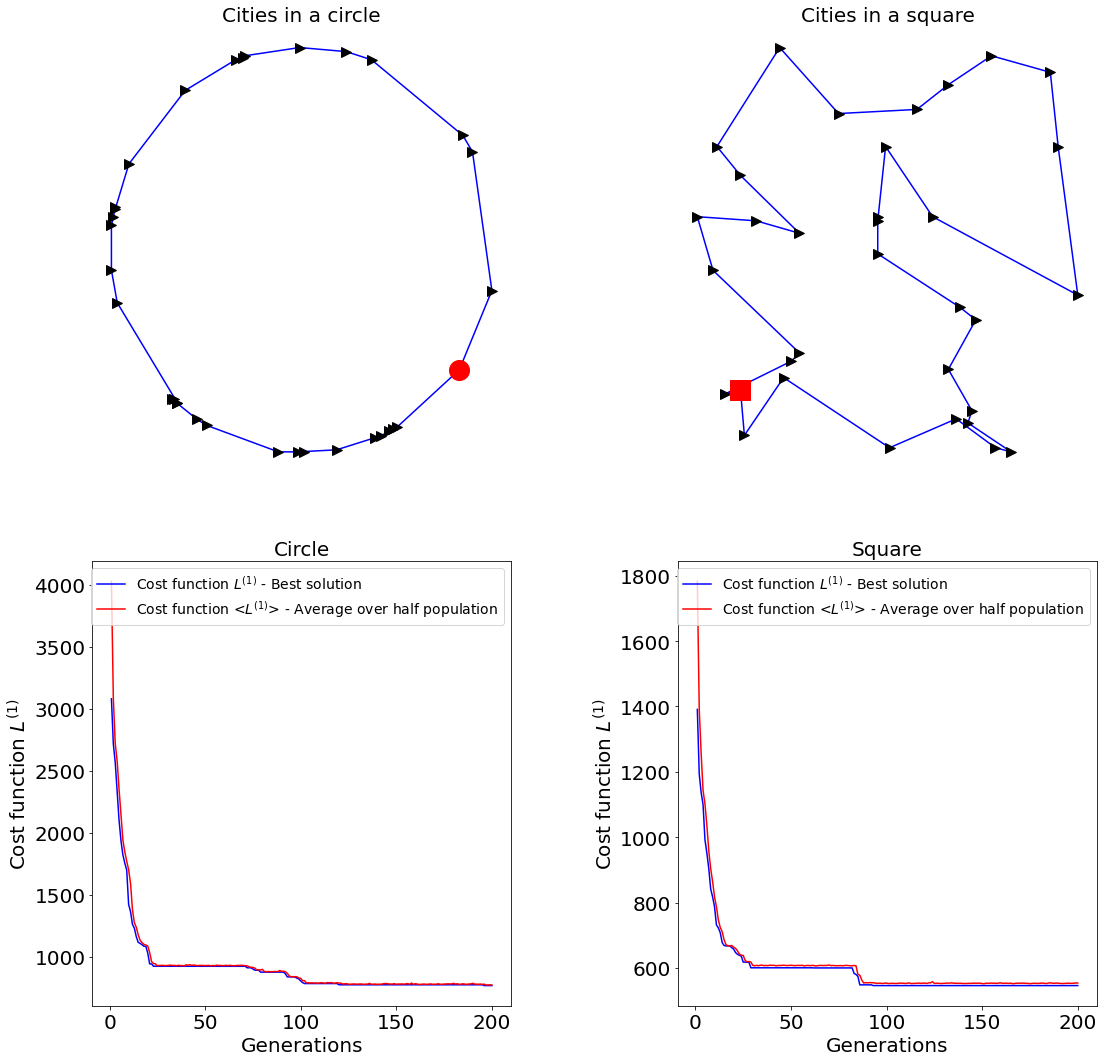

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 20})
ID_s, x_cities_s, y_cities_s= np.loadtxt("data/out_cities_square.dat", usecols= (0,1,2), unpack = "true")
ID_c, x_cities_c, y_cities_c= np.loadtxt("data/out_cities_circle.dat", usecols= (0,1,2), unpack = "true")
#x_s,L_s, L_mean_s= np.loadtxt("square/output.L_means.dat", usecols= (0,1,2), unpack = "true")
x_cities_s = np.append(x_cities_s,x_cities_s[0])
y_cities_s = np.append(y_cities_s,y_cities_s[0])
x_cities_c = np.append(x_cities_c,x_cities_c[0])
y_cities_c = np.append(y_cities_c,y_cities_c[0])
fig, axs = plt.subplots(2, 2,figsize=(18,18))
plt.subplots_adjust(wspace=0.4, hspace=0.2)

axs[0,1].plot(x_cities_s[0:],y_cities_s[0:],"->",ms = 10, color ="blue",mec = 'black', mfc = 'black')
axs[0,1].plot(x_cities_s[0],y_cities_s[0],ms = 20,marker = "s", color ="red", label = "Start")

axs[0,1].set_title("Cities in a square", fontsize = 20)
axs[0,1].axis("off")

axs[0,0].plot(x_cities_c[0:],y_cities_c[0:],"->",ms = 10, color ="blue",mec = 'black', mfc = 'black')
axs[0,0].plot(x_cities_c[0],y_cities_c[0],ms = 20,marker = "o", color ="red", label = "Start")

axs[0,0].set_title("Cities in a circle", fontsize = 20)
axs[0,0].axis("off")

x_L_s, L_s, L_ave_s= np.loadtxt("data/out_L_square.dat", usecols= (0,1,2), unpack = "true")
x_L_c, L_c, L_ave_c= np.loadtxt("data/out_L_circle.dat", usecols= (0,1,2), unpack = "true")
x_s = np.linspace(1,len(L_ave_s),len(L_ave_s))
x_c = np.linspace(1,len(L_ave_c),len(L_ave_c))

axs[1,1].plot(x_L_s,L_s, color ="blue",label="Cost function $ L^{(1)} $ - Best solution")
axs[1,1].plot(x_s,L_ave_s, color ="red",label="Cost function <$ L^{(1)} $> - Average over half population")
axs[1,1].set_title("Square", fontsize = 20)
axs[1,1].set_xlabel("Generations", fontsize = 20)
axs[1,1].set_ylabel("Cost function $ L^{(1)} $", fontsize = 20)
axs[1,1].legend( fontsize = 14)

axs[1,0].plot(x_L_c,L_c, color ="blue",label="Cost function $ L^{(1)} $ - Best solution")
axs[1,0].plot(x_c,L_ave_c, color ="red",label="Cost function <$ L^{(1)} $> - Average over half population")
axs[1,0].set_title("Circle", fontsize = 20)
axs[1,0].set_xlabel("Generations", fontsize = 20)
axs[1,0].set_ylabel("Cost function $ L^{(1)} $", fontsize = 20)
axs[1,0].legend( fontsize = 14)


plt.show()


The parameters setted on the .cpp program are the following:
 - for square:
    - individual for each population = 500 
    - number of generations = 200 
    - mutation probability = 0.3 
    - crossover probability = 0.8 
    - selection operator exponent = 4
      
 - for circle:
    - individual for each population = 500 
    - number of generations = 200 
    - mutation probability = 0.6 
    - crossover probability = 0.5 
    - selection operator exponent = 2
   